In [1]:
%matplotlib inline  
import glob,h5py,os,re
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\usepackage{amsfonts}','\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from datasets.load import loadDataset
dset = '_filtered3months_indicators'
dataset = loadDataset(dset, combineObsInd=True,withActions=False)
from utils.medical import cleanLabels
patient_dict =  cleanLabels(dataset['patient_dictionary'],'_filtered3months_indicators')

Found medical files...
Data Shape for Obs|Act|Ind:  (8244, 18, 48) (8244, 18, 8) (8244, 18, 4)
<<< Train (5276)/Valid (1319)/Test (1649) >>>
<<<Appending indicators to observations>>>
<<<Ignoring actions>>>


In [3]:
dataset['train_X'][0].shape

(18, 52)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51] FULL
(18, 52) (5276, 18, 52) 52
1.0 0.0
ERROR! Session/line number was not unique in database. History logging moved to new session 638


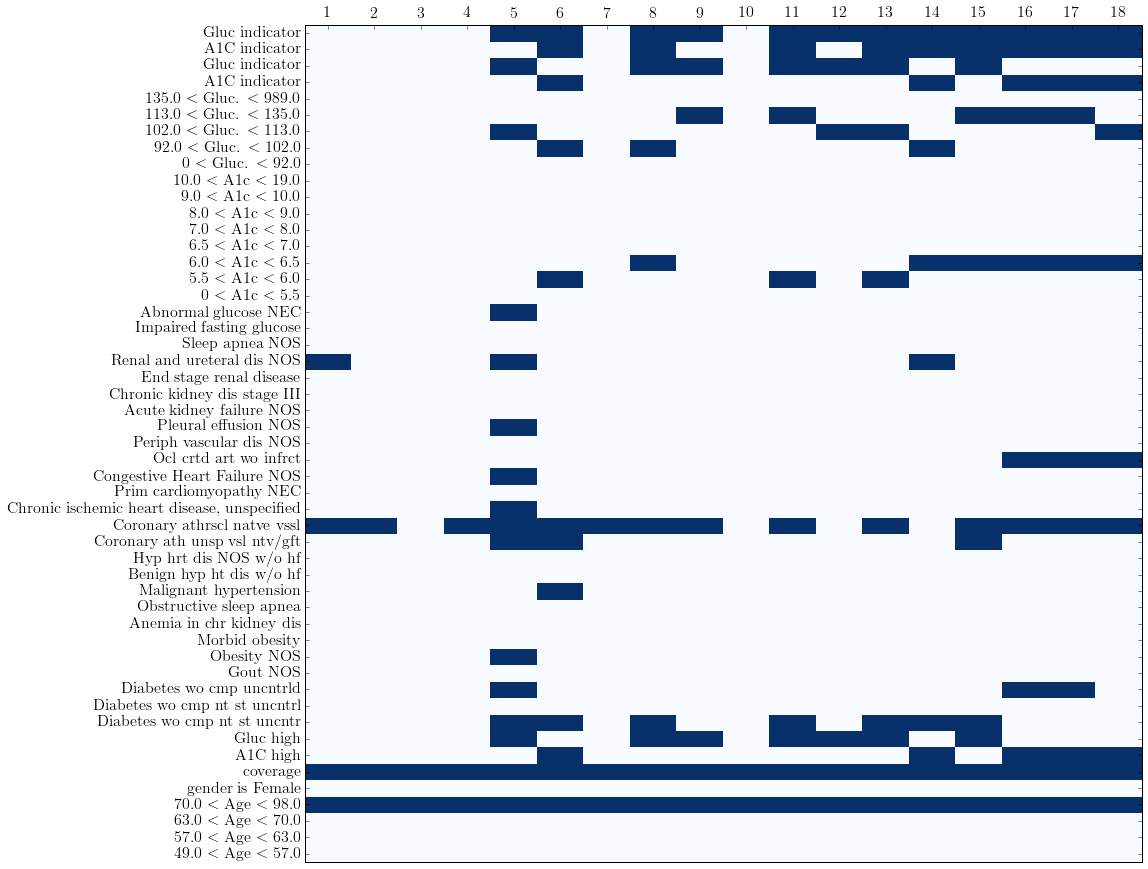

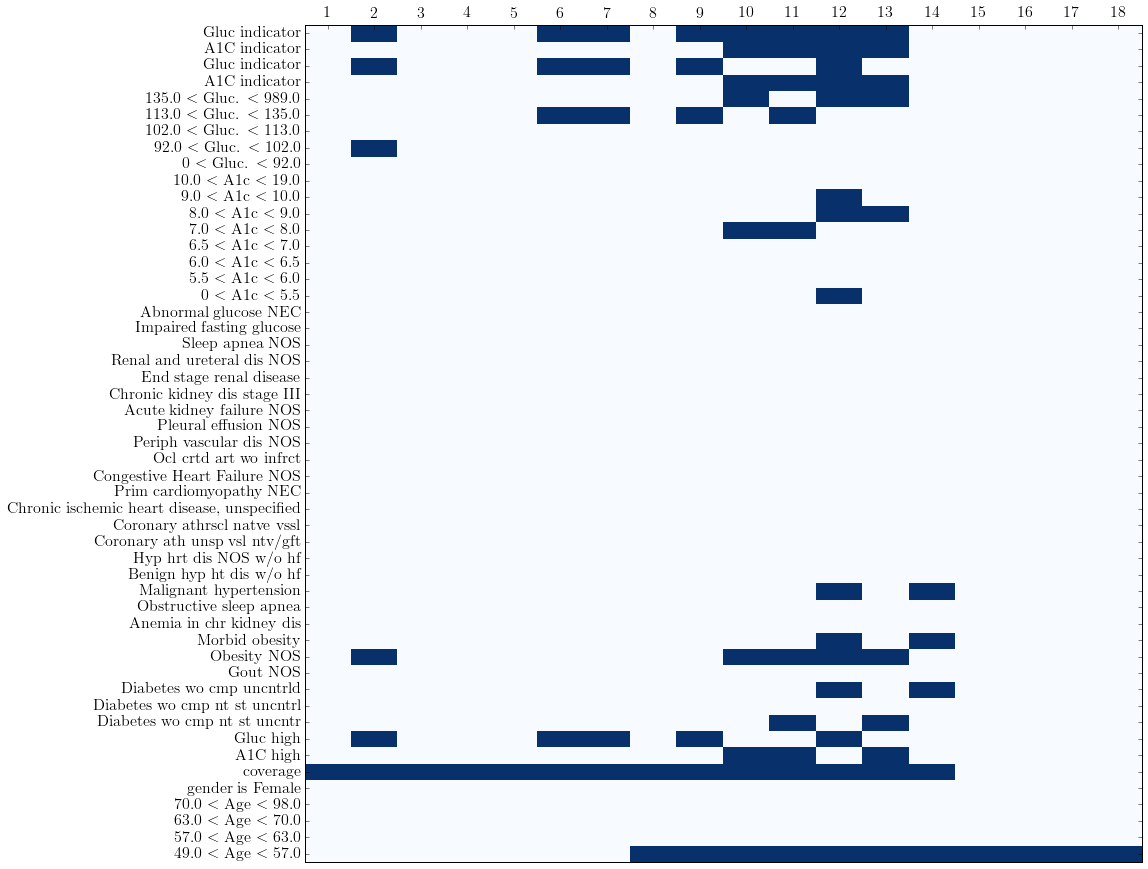

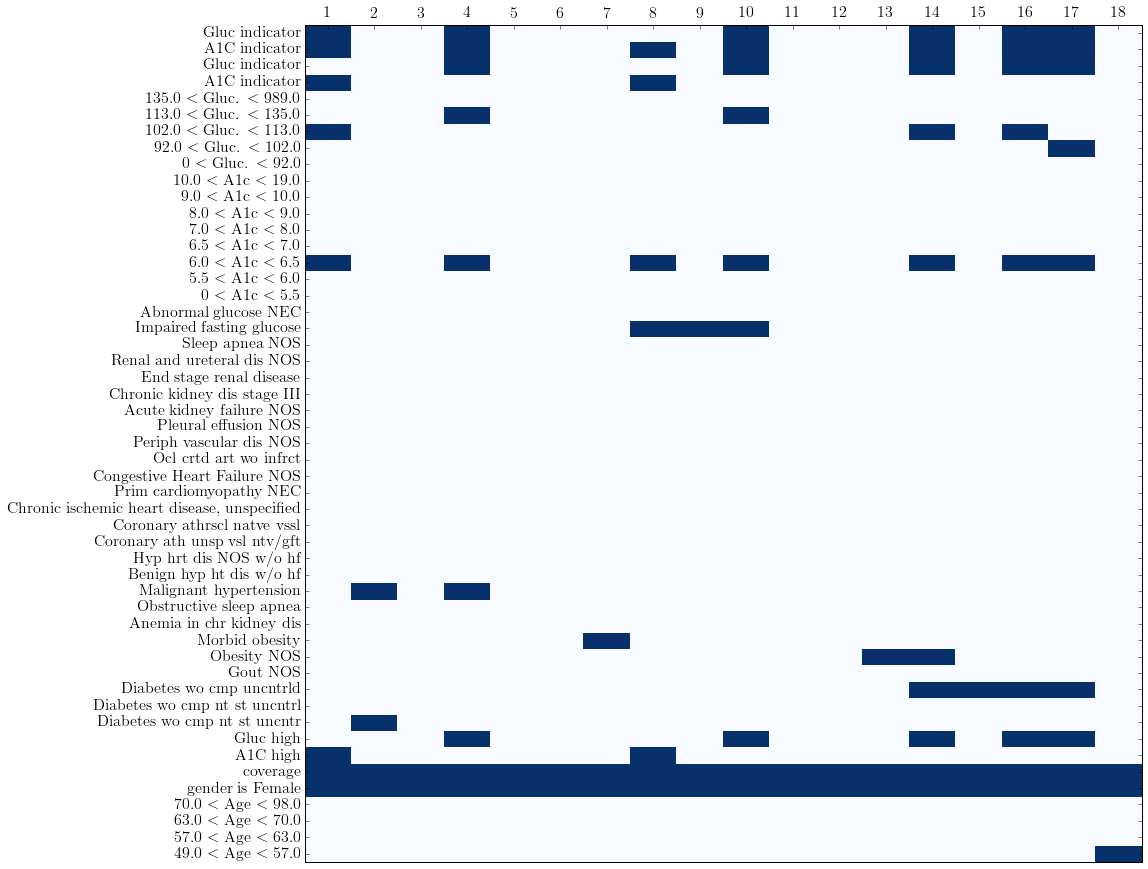

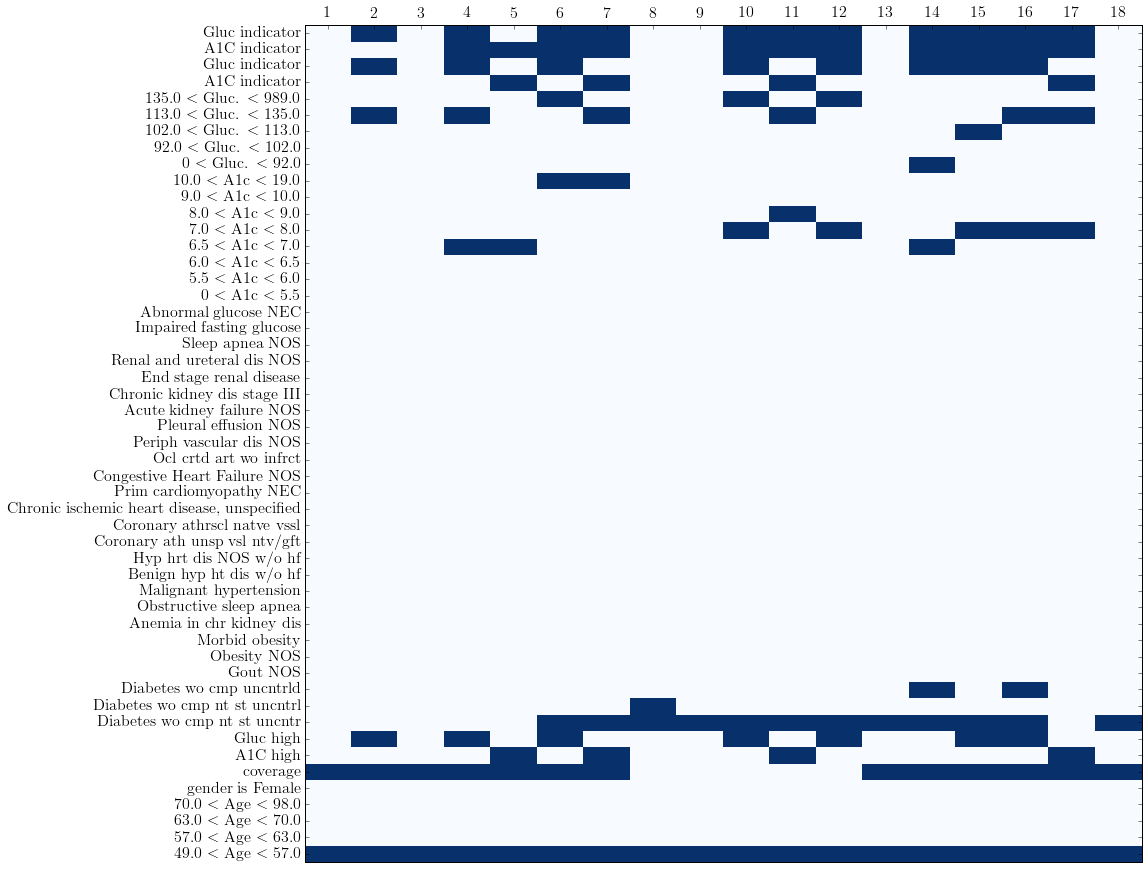

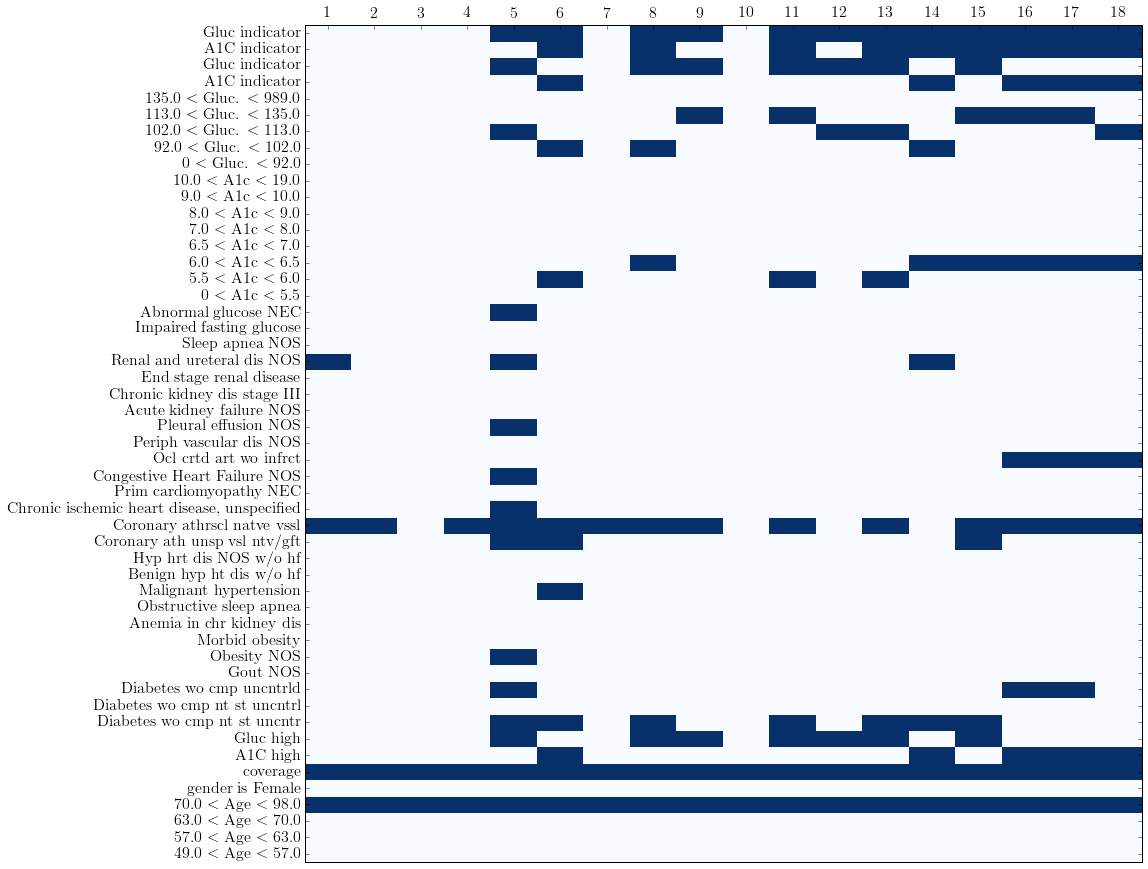

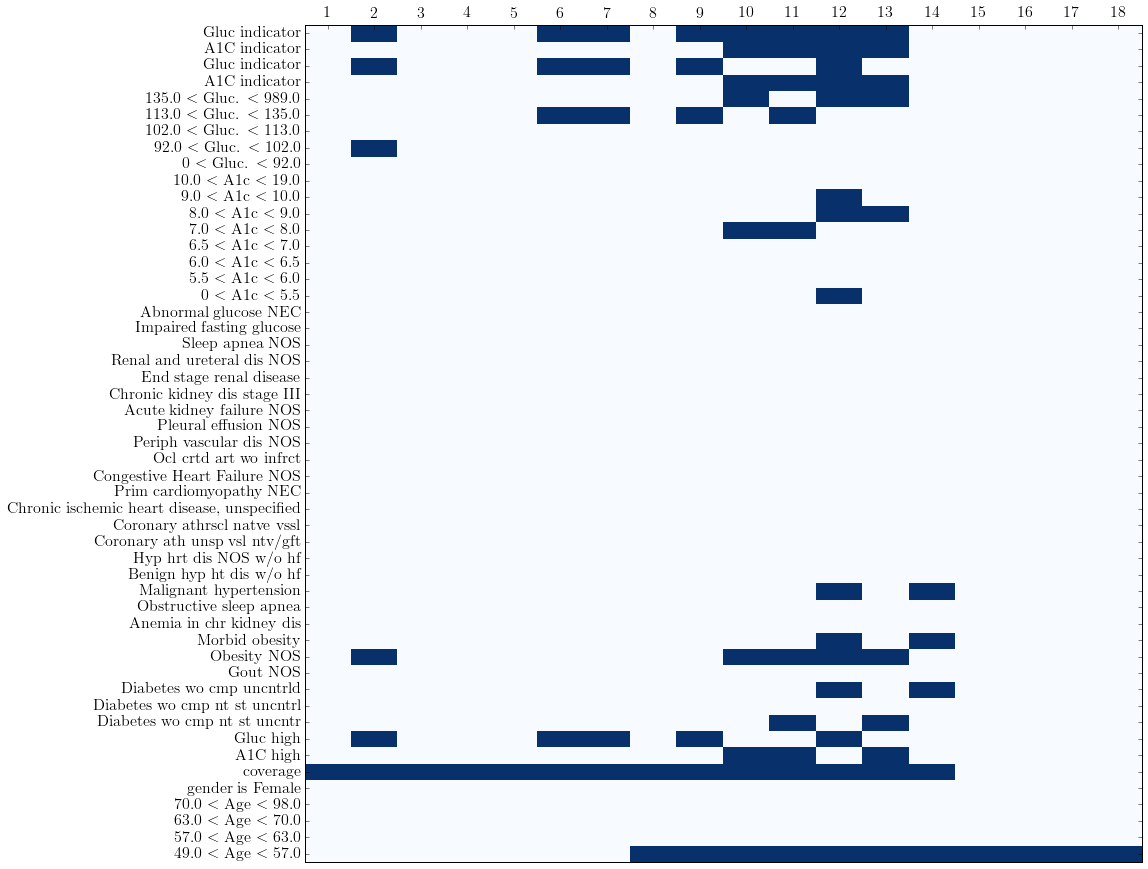

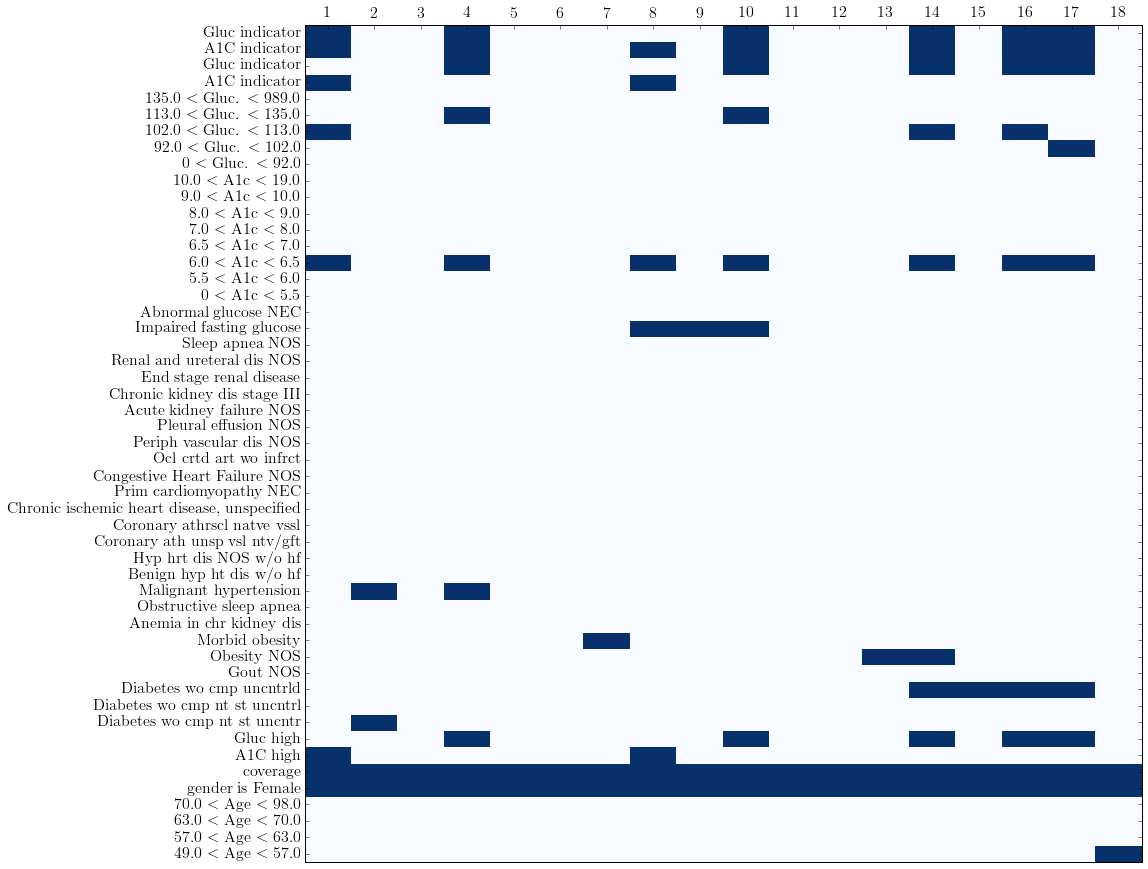

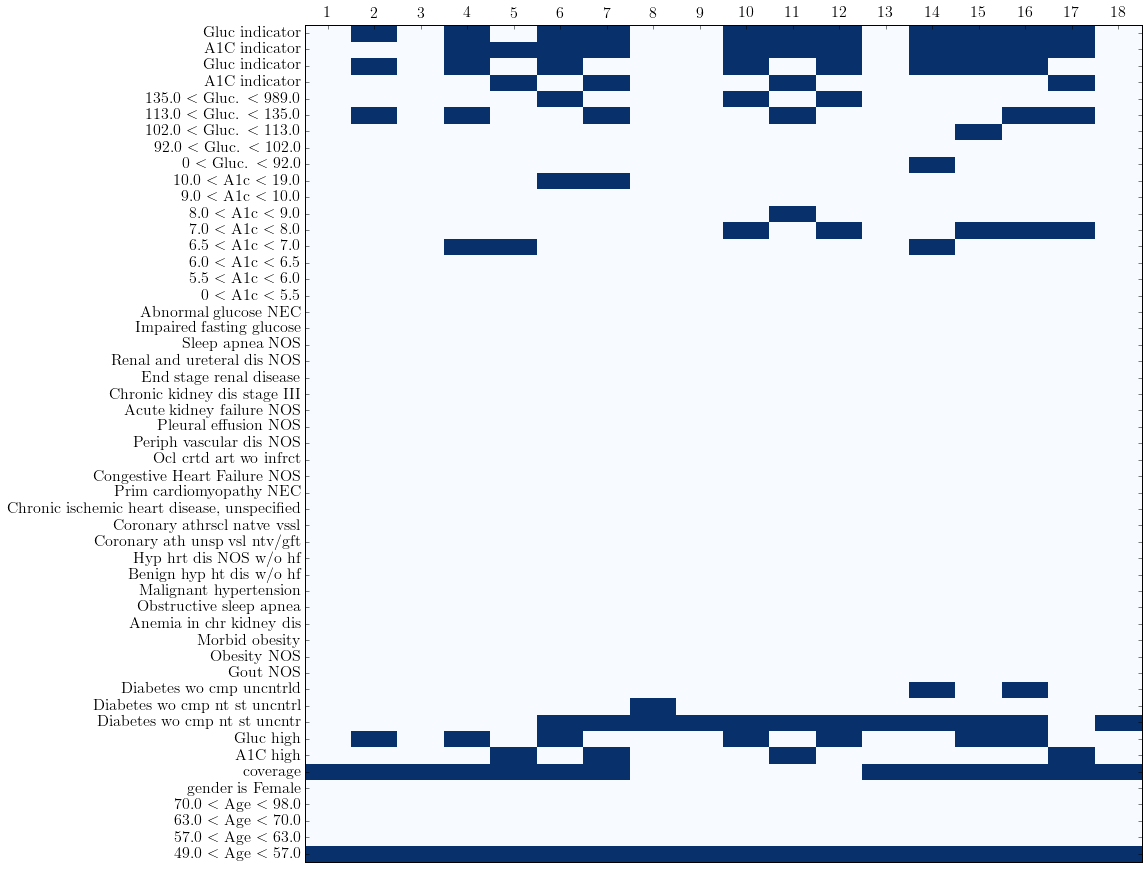

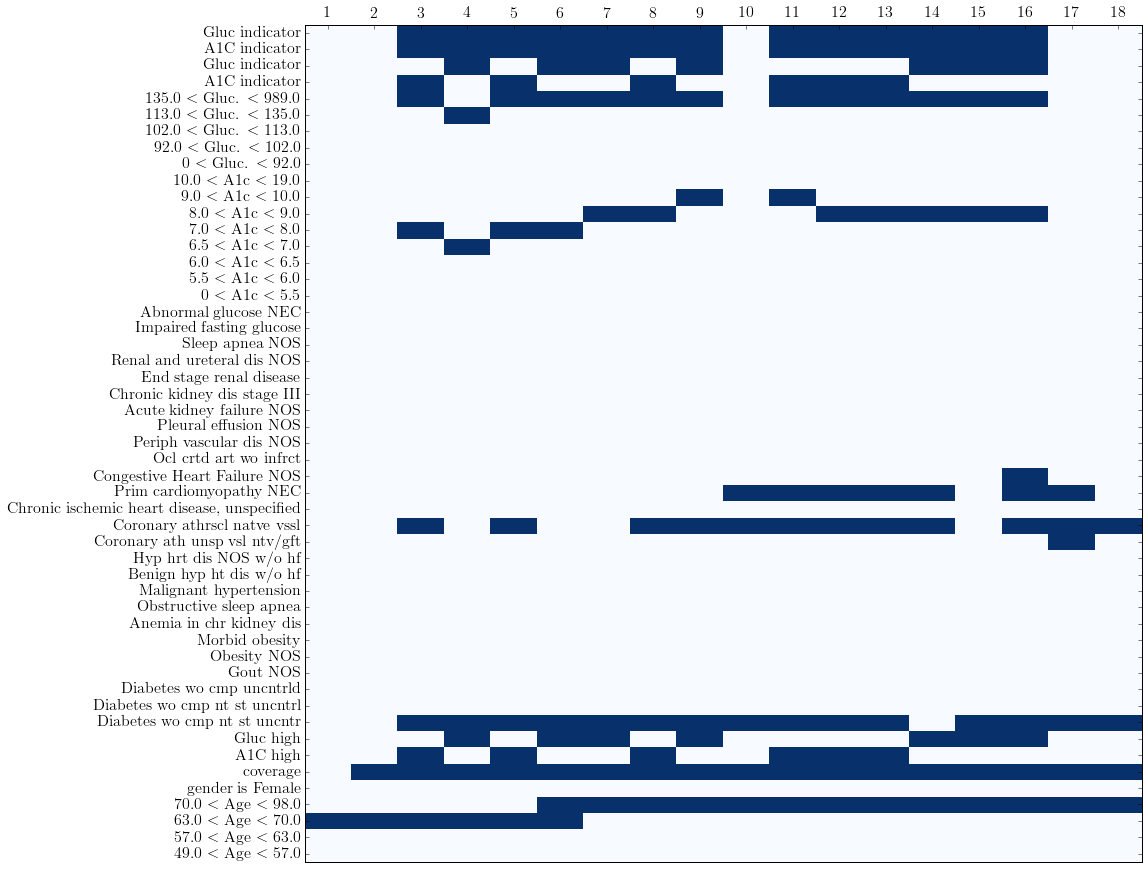

In [5]:
#IDX = range(0,15)+range(30,len(patient_dict)); name = 'SMALL'
IDX = range(len(patient_dict)); name = 'FULL'
print IDX,name

#Sample from the generative model
import numpy as np
np.random.seed(1)
mean_p = dataset['train_X'][:100]
print mean_p[0].shape, dataset['train_X'].shape,len(dataset['patient_dictionary'])
print mean_p.max(),mean_p.min()


#Visualize Samples
samples = mean_p
for idx in range(5):
    row_labels = [patient_dict[k] for k in IDX]
    data = samples[idx][:,IDX]
    column_labels = range(1,data.shape[0]+1)
    fig, ax = plt.subplots(1,1,figsize=(15,15))
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)
    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)
    # want a more natural, table-like display
    ax.xaxis.tick_top()
    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False,fontsize=16)
    ax.set_yticklabels(row_labels, minor=False,fontsize=16)
    ax.set_ylim((1,len(row_labels)))
    plt.savefig('train-'+str(idx)+'-'+name+'.pdf',bbox_inches='tight')